In [54]:
import rioxarray as rxr
import geopandas as gpd
from rioxarray.merge import merge_arrays
import numpy as np
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from shapely.geometry import mapping

In [5]:
part_1 = rxr.open_rasterio('part_1.tif', masked=True)
part_2 = rxr.open_rasterio('part_2.tif', masked=True)

In [34]:
part_1_2193 = part_1.rio.reproject(
  'EPSG:2193',
  resolution=(10, 10),
  resampling=Resampling.nearest
)

part_2_2193 = part_2.rio.reproject(
  'EPSG:2193',
  resolution=(10, 10),
  resampling=Resampling.nearest
)

In [35]:
rasters = [part_1_2193, part_2_2193]

merged_rasters = merge_arrays(dataarrays=rasters, crs=part_1_2193.rio.crs, nodata=np.nan)

In [36]:
print(merged_rasters.rio.crs)

EPSG:2193


In [39]:
print(merged_rasters.rio.resolution())

(10.0, -10.0)


In [42]:
clip_feature = gpd.read_file('clip_feature.shp')

In [43]:
clip_feature.to_crs(epsg=2193, inplace=True)

In [58]:
geometries = clip_feature.geometry.apply(mapping)

In [89]:
data_park = merged_rasters.rio.clip(
  geometries,
  clip_feature.crs,
  drop=False,
  invert=False
)

In [90]:
data_park.rio.nodata

np.float32(nan)

In [91]:
data_park.shape

(4, 23, 57)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

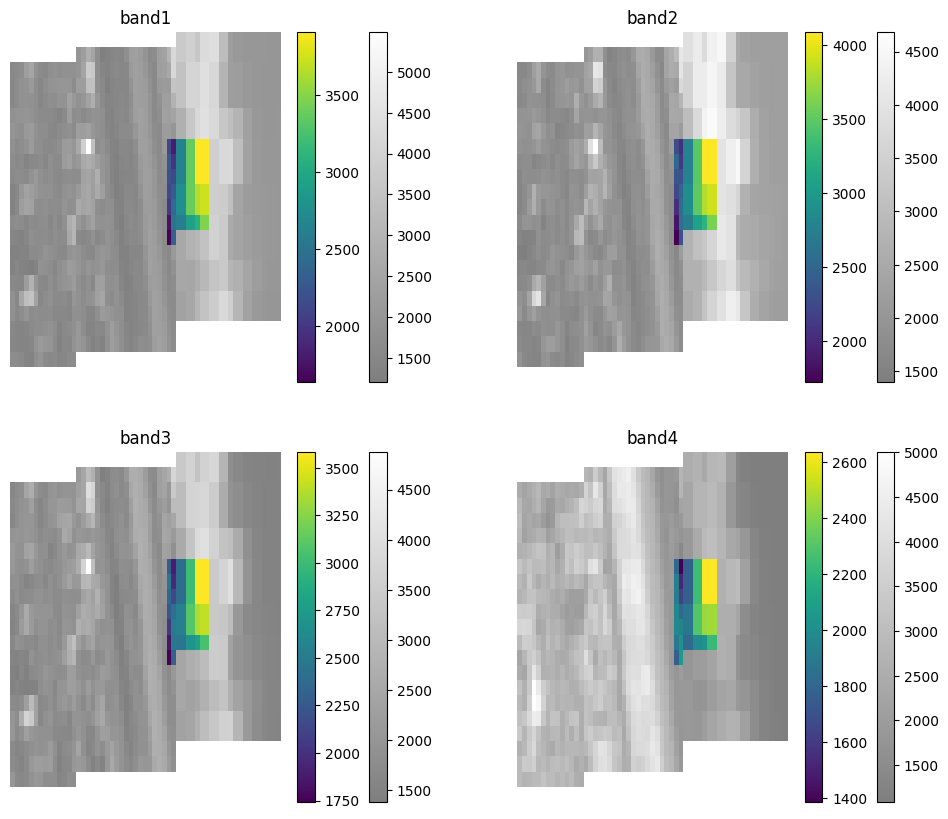

In [96]:
fig, axes = plt.subplots(2,2,figsize=(12,10))

(ax1, ax2, ax3, ax4) = axes.flatten()

merged_rasters[0].plot(ax=ax1, cmap="gray", alpha=0.5)
data_park[0].plot(ax=ax1)
ax1.set_axis_off()
ax1.set(title='band1')

merged_rasters[1].plot(ax=ax2, cmap="gray", alpha=0.5)
data_park[1].plot(ax=ax2)
ax2.set_axis_off()
ax2.set(title='band2')

merged_rasters[2].plot(ax=ax3, cmap="gray", alpha=0.5)
data_park[2].plot(ax=ax3)
ax3.set_axis_off()
ax3.set(title='band3')

merged_rasters[3].plot(ax=ax4, cmap="gray", alpha=0.5)
data_park[3].plot(ax=ax4)
ax4.set_axis_off()
ax4.set(title='band4')

plt.tight_layout

In [78]:
part1 = rxr.open_rasterio('part_1.tif', masked=True)
part2 = rxr.open_rasterio('part_2.tif', masked=True)

part1 = part1.rio.reproject(
    'EPSG:2193',
    resolution=(10, 10),
    resampling=Resampling.nearest
)

part2 = part2.rio.reproject(
    'EPSG:2193',
    resolution=(10, 10),
    resampling=Resampling.nearest
)

rasters = [part1, part2]

merged = merge_arrays(
    dataarrays=rasters,
    crs=part1.rio.crs,
    nodata=np.nan
)

clip = gpd.read_file('clip_feature.shp')

clip.to_crs(epsg=2193, inplace=True)

geometries = clip.geometry.apply(mapping)

data_park = merged.rio.clip(
    geometries,
    clip.crs,
    drop=True,
    invert=False
)

In [81]:
data_park.rio.crs

CRS.from_wkt('PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",GEOGCS["NZGD2000",DATUM["New_Zealand_Geodetic_Datum_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6167"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4167"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",173],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1600000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","2193"]]')

In [85]:
data_park.rio.resolution()

(10.0, -10.0)